# College Basketball Machine Learning Model
## Spring 2025 Data Science Project
Collaborators: Jonathan Roth, Dylan Edwards, Abdul Khan

**Contributions Summary:**

A: Project idea

B: Dataset Curation and Preprocessing

C: Data Exploration and Summary Statistics

D: ML Algorithm Design/Development

E: ML Algorithm Training and Test Data Analysis

F: Visualization, Result Analysis, Conclusion

G: Final Tutorial Report Creation

**Jonathan Roth:**
Sections: A, B, D, E

Led the initial project brainstorming and helped design the predictive modeling pipeline. Contributed to data collection, preprocessing, and developing the machine learning algorithms used for training and evaluation.

**Dylan Edwards:**
Sections: A, C, D, F

Worked on data exploration, statistical analysis, and visualizations. Also contributed to refining the machine learning models and analyzing results, helping to translate outputs into meaningful insights.

**Abdul Khan:**
Sections: B, F, G

Supported dataset curation and home court advantage integration. Also helped with visualizing final results, writing up the tutorial report, and crafting the introduction and conclusion for the final submission.

## Introduction
In college basketball, predicting the outcome of a game and especially the final point spread is no easy task. Our project tackles this challenge by using historical NCAA data and advanced analytics to build a model that can forecast game results with a focus on accuracy.

We aim to answer the following questions:


*   Can we accurately predict the outcome of a college basketball game using advanced team statistics?
*   How much does home court advantage actually impact the final score or spread?
*   Which factors—offensive efficiency, defensive metrics, location—are most important in determining a game’s result?

To explore these questions, we collected detailed stats from BartTorvik.com for the 2023–2024 season and home court advantage estimates from public sources. These datasets give us thousands of game records and team-specific metrics that serve as the foundation for our predictions.

In this project we aim to show how real world sports data can be turned into accurate predictions, and how much of the college basketball game can be understood through data.

## Data Collection

To build a robust predictive model for college basketball game outcomes, we curated data from two primary sources. First, historical and current game statistics from the 2023–2024 and 2025 seasons were collected from BartTorvik.com, a platform for advanced college basketball analytics. This dataset included metrics such as adjusted offensive/defensive efficiency, tempo, effective field goal percentage, and turnover rates, which are critical for evaluating team performance. Second, to account for the impact of venue, home court advantage values for NCAA teams were sourced from Boyd’s Bet's. These sources were chosen for their reliability and alignment with the structured game data.

The data collection process involved web scraping to automate extraction. For game statistics, Python’s Selenium library was employed to navigate BartTorvik’s dynamic content, including paginated tables and filters, using a headless browser to simulate user interactions. This ensured comprehensive coverage of all teams and seasons. For home court advantage data, a secondary scrape using BeautifulSoup parsed static HTML tables from Boyd’s Bets.

##Data Preprocessing
Raw datasets underwent rigorous cleaning and transformation to ensure usability. Duplicate entries and irrelevant columns were removed, while missing values were addressed by filtering out teams without corresponding home court data. Team names were standardized across datasets to enable accurate merging. The cleaned game statistics were merged with home court advantage values using team names as keys. To isolate venue effects, home advantage values were set to 0 for neutral-site and away games.

# Webscraper for Historical and Current Games


Basic installing of packages for the selenium webdriver.

In [ ]:
# # Google Colab setup for Selenium + Headless Chrome
%%capture
!apt-get update -qq
!apt install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install -q selenium


IMPORTS

In [ ]:
import time
import io
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, classification_report
from sklearn.inspection import permutation_importance
import joblib
import os

This is the webscraper that gets the basic data from barttorvik and puts it into two seperate csv files. historical_df represents game data from the 2023 and 2024 seasons, whereas current_df represents the current data from the ongoing 2025 season.

In [ ]:


# Historical URLs (2023-2024)
historical_urls = [
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=0&quad=1",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=2",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=3",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=1",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=2",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=3",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1",
]

# 2025 URLs
current_urls = [
    'https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2000&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=1'
]

# Function to scrape game data from BartTorvik.com
def scrape_urls(urls, output_filename):
    dfs_all = []

    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    driver = webdriver.Chrome(options=chrome_options)

    for url in urls:
        print(f"Scraping: {url}")
        driver.get(url)
        time.sleep(10)
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        tables = soup.find_all("table")
        print(f"  Found {len(tables)} table(s).")

        if len(tables) >= 2:
            tbl_html = str(tables[1])
            df_list = pd.read_html(io.StringIO(tbl_html))
            if df_list:
                df_second = df_list[0]
                dfs_all.append(df_second)
                print(f"  Successfully parsed the second table (shape: {df_second.shape})")
            else:
                print("  Could not parse the second table with pd.read_html.")
        else:
            print("  There's no second table on this page.")

    driver.quit()

    if dfs_all:
        df_combined = pd.concat(dfs_all, ignore_index=True)
        df_combined.to_csv(output_filename, index=False)
        print(f"\nSaved all second tables to '{output_filename}' (total rows: {len(df_combined)})")
        return df_combined
    else:
        print(f"\nNo data frames were found; no CSV file was created for {output_filename}.")
        return None

# Run the scrapers
print("\n=== SCRAPING HISTORICAL DATA (2023-2024) ===")
historical_df = scrape_urls(historical_urls, "historical_games.csv")

print("\n=== SCRAPING CURRENT SEASON DATA (2025) ===")
current_df = scrape_urls(current_urls, "2025_games.csv")



=== SCRAPING HISTORICAL DATA (2023-2024) ===
Scraping: https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=0&quad=1
  Found 2 table(s).
  Successfully parsed the second table (shape: (1945, 25))
Scraping: https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&

# Add Home Court Advantage Into Dataset


Home court advantage is especially important in college basketball, so we collected data from Boyds Bets that gave the historical advantage each team has when they play at home and added it into our dataset.

In [ ]:
historical_df = pd.read_csv("historical_games.csv")
current_df = pd.read_csv("2025_games.csv")
url="https://www.boydsbets.com/college-basketball-home-court-advantage/"
def scrape_home_court_advantage():
  chrome_options = Options()
  chrome_options.add_argument("--headless")
  chrome_options.add_argument("--no-sandbox")
  chrome_options.add_argument("--disable-dev-shm-usage")
  driver = webdriver.Chrome(options=chrome_options)
  print(f"Scraping: {url}")
  driver.get(url)
  time.sleep(3)
  html = driver.page_source
  soup = BeautifulSoup(html, "html.parser")
  tables = soup.find_all("table")
  print(f"  Found {len(tables)} table(s).")
  table=str(tables[0])

  homecourt_ad_df = pd.read_html(io.StringIO(table))[0]
  homecourt_ad_df.dropna(inplace=True)
  homecourt_ad_df.to_csv("homecourt_advantage.csv", index=False)
  driver.quit()
  return homecourt_ad_df

temp_hc_ad_df=scrape_home_court_advantage()


Scraping: https://www.boydsbets.com/college-basketball-home-court-advantage/
  Found 1 table(s).


We now have 3 data frames that need to be put together and cleaned. We will focus on historical data for the statistical analysis portion then leave the current year games for our testing data of our machine learning model.

# Basic Data Cleaning

Making the columns of our historical dataframe correct and dropping some uncessisary columns and rows.

In [ ]:
historical_df.columns = historical_df.iloc[0]
historical_df.drop(historical_df.head(1).index,inplace=True)
historical_df.drop(historical_df.tail(1).index,inplace=True)
historical_df.drop(historical_df.columns[-1],inplace=True,axis=1)
historical_df.drop(historical_df.columns[0],inplace=True, axis=1)
current_df.columns = current_df.iloc[0]
current_df.drop(current_df.head(1).index,inplace=True)
current_df.drop(current_df.tail(1).index,inplace=True)
current_df.drop(current_df.columns[-1],inplace=True,axis=1)
current_df.drop(current_df.columns[0],inplace=True, axis=1)

Merging in the home court advantage. Alot of the names between the two dataframes need to be slightly adjusted for the merge to work. Then any NaN values that are still not there will just be dropped from the DataFrame.

In [ ]:
import numpy as np


name_changes={
    "NC State": "N.C. State",
    "Indiana St": "Indiana St.",
    "San Diego St": "San Diego St.",
    "Mississippi St": "Mississippi St.",
    "North Carolina St": "North Carolina St.",
    "Penn St": "Penn St.",
    "Ohio St": "Ohio St.",
    "Ohio State": "Ohio St.",
    "Iowa St": "Iowa St.",
    "Boise St": "Boise St.",
    "Fresno St": "Fresno St.",
    "Arizona St": "Arizona St.",
    "Texas AM": "Texas A&M",
    "Utah St": "Utah St.",
    "Texas St": "Texas St.",
    "Michigan St": "Michigan St.",
    "Washington St": "Washington St.",
    "Kansas St": "Kansas St.",
    "Miami Florida": "Miami FL",
    "Texas Christian": "TCU",
    "Northwestern St": "Northwestern St.",
    "McNeese St": "McNeese St.",
    "Morehead St": "Morehead St.",
    "Wisconsin St": "Wisconsin St.",
    "South Dakota State": "South Dakota St.",
    "Colorado St": "Colorado St.",
    "Long Beach St": "Long Beach St.",
    "Brigham Young": "BYU",
    "Florida St": "Florida St.",
    "Louisiana State": "LSU",
    "Southern California": "USC",
    "Central Florida": "UCF",
    "Louisiana Tech": "UT",
    "Missouri St": "Missouri St.",
    "Alabama St": "Alabama St.",
    "Oklahoma St": "Oklahoma St.",
    "Citadel": "The Citadel",
    "Arkansas St": "Arkansas St.",
    "Murray St": "Murray St.",
    "Southern Methodist": "SMU",
    "St Johns": "St. John's",
    "San Jose St": "San Jose St.",
    "Pennsylvania": "Penn",
    "St Bonaventure": "St. Bonaventure",
    "Oregon St": "Oregon St.",
    "Wichita St": "Wichita St.",
}

temp_hc_ad_df['Team']=temp_hc_ad_df['Team'].replace(name_changes)
historical_df = historical_df.merge(temp_hc_ad_df[['Team','True Advantage']], on='Team', how='left')
nan_rows = historical_df[historical_df['True Advantage'].isna()]
historical_df.dropna(subset=['True Advantage'],inplace=True)
#temp_hc_ad_df['Team']=temp_hc_ad_df['Team'].replace(name_changes)
current_df = current_df.merge(temp_hc_ad_df[['Team','True Advantage']], on='Team', how='left')
nan_rows = current_df[current_df['True Advantage'].isna()]
current_df.dropna(subset=['True Advantage'],inplace=True)
historical_df["hca"]=historical_df["True Advantage"]
current_df["hca"]=current_df["True Advantage"]
# historical_df.drop(columns=['True Advantage'],inplace=True)
# current_df.drop(columns=['True Advantage'],inplace=True)
display(historical_df)

,Rk,Date,Type,Team,Conf.,Opp.,Venue,Result,Adj. O,Adj. D,...,FTR,EFF,eFG%,TO%,Reb%,FTR,G-Sc,+/-,True Advantage,hca
0,1,4/8/24,T,Connecticut,BE,Purdue,N,"W, 75-60",135,83.5,...,17.7,98.1,45.4,14.7,30,27.8,99.6,7,3.86,3.86
1,2,4/8/24,T,Purdue,B10,Connecticut,N,"L, 75-60",115.3,99.6,...,27.8,122.6,53.2,13.1,42.4,17.7,84.3,-7,4.54,4.54
2,3,4/6/24,T,Alabama,SEC,Connecticut,N,"L, 86-72",136.3,109.8,...,19,136.8,58.1,6.4,36.4,29,92.3,-4,4.86,4.86
3,4,4/6/24,T,Connecticut,BE,Alabama,N,"W, 86-72",137.2,98.7,...,29,114.5,54.3,12.7,24.2,19,97.8,4,3.86,3.86
4,5,4/6/24,T,N.C. State,ACC,Purdue,N,"L, 63-50",87,81.8,...,7,97.9,49.1,24.9,33.3,18.2,66.9,-8,2.75,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,96,2/23/23,C,Eastern Washington,BSky,Weber St.,A,"W, 89-82",137.8,129.2,...,43.4,123,52.5,15,37.1,40.7,67.7,2,3.94,3.94
9847,97,2/8/23,C,Alabama,SEC,Florida,H,"W, 97-69",137.8,90.9,...,20.5,91.5,38.1,13.3,28.3,49.2,99.2,18,4.86,4.86
9848,98,11/26/22,N,Boise St.,MWC,Utah Valley,H,"W, 87-69",137.8,99.3,...,24.6,100.7,48.2,14.6,23.5,35.7,97.7,11,3.59,3.59
9849,99,2/2/23,C,Arizona,P12,Oregon,H,"W, 91-76",137.7,99.7,...,37.9,107.8,48.4,17,30.8,28.6,97.6,11,3.51,3.51


Now we have a set of duplicated columns with the first relating to offense statistics and the latter being defensive so let us show reflect this into our dataframe for later use. Additionally, we updated the true advantage column to show 0 unless the venue is Home "H".

In [ ]:
historical_df.columns=['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'EFF_O', 'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O', 'EFF_D',
       'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D', 'G-Sc', '+/-', 'True Advantage','hca']

historical_df.loc[historical_df['Venue'].str.upper() != 'H', 'True Advantage'] = 0
current_df.columns=['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'EFF_O', 'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O', 'EFF_D',
       'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D', 'G-Sc', '+/-', 'True Advantage','hca']

current_df.loc[current_df['Venue'].str.upper() != 'H', 'True Advantage'] = 0

display(historical_df.columns)

Index(['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'EFF_O', 'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O',
       'EFF_D', 'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D', 'G-Sc', '+/-',
       'True Advantage', 'hca'],
      dtype='object')

Now lets make a score column so the team can have a score instead of just a scorebox.

In [ ]:
historical_df['Won/Loss']=historical_df['Result'].str[0]
temp=historical_df["Result"].str.split(', ', expand=True)
historical_df["Score Range"]=temp[1]
temp2=historical_df["Score Range"].str.split('-', expand=True).astype(int)

def score_fun(row):
  (s1,s2)=row['Score Range'].split('-')
  (s1,s2)=int(s1),int(s2)
  if row['Won/Loss']=='W':
    return max(s1,s2)
  else:
    return min(s1,s2)
def opp_score_fun(row):
  (s1,s2)=row['Score Range'].split('-')
  (s1,s2)=int(s1),int(s2)
  if row['Won/Loss']=='W':
    return min(s1,s2)
  else:
    return max(s1,s2)
historical_df['Score']=historical_df.apply(score_fun,axis=1)
historical_df['Opp_Score']=historical_df.apply(opp_score_fun,axis=1)

current_df['Won/Loss']=current_df['Result'].str[0]
temp=current_df["Result"].str.split(', ', expand=True)
current_df["Score Range"]=temp[1]
temp2=current_df["Score Range"].str.split('-', expand=True).astype(int)

def score_fun(row):
  (s1,s2)=row['Score Range'].split('-')
  (s1,s2)=int(s1),int(s2)
  if row['Won/Loss']=='W':
    return max(s1,s2)
  else:
    return min(s1,s2)
def opp_score_fun(row):
  (s1,s2)=row['Score Range'].split('-')
  (s1,s2)=int(s1),int(s2)
  if row['Won/Loss']=='W':
    return min(s1,s2)
  else:
    return max(s1,s2)
current_df['Score']=current_df.apply(score_fun,axis=1)
historical_df['Opp_Score']=historical_df.apply(opp_score_fun,axis=1)
current_df['Opp_Score']=current_df.apply(opp_score_fun,axis=1)
current_df['Spread']=current_df['Score']-current_df['Opp_Score']
historical_df['Spread']=historical_df['Score']-historical_df['Opp_Score']
display(historical_df)
display(historical_df.columns)
historical_df.to_csv("Cleaned_Historicals.csv",index=False)
current_df.to_csv("Cleaned_2025.csv",index=False)

,Rk,Date,Type,Team,Conf.,Opp.,Venue,Result,Adj. O,Adj. D,...,FTR_D,G-Sc,+/-,True Advantage,hca,Won/Loss,Score Range,Score,Opp_Score,Spread
0,1,4/8/24,T,Connecticut,BE,Purdue,N,"W, 75-60",135,83.5,...,27.8,99.6,7,0.00,3.86,W,75-60,75,60,15
1,2,4/8/24,T,Purdue,B10,Connecticut,N,"L, 75-60",115.3,99.6,...,17.7,84.3,-7,0.00,4.54,L,75-60,60,75,-15
2,3,4/6/24,T,Alabama,SEC,Connecticut,N,"L, 86-72",136.3,109.8,...,29,92.3,-4,0.00,4.86,L,86-72,72,86,-14
3,4,4/6/24,T,Connecticut,BE,Alabama,N,"W, 86-72",137.2,98.7,...,19,97.8,4,0.00,3.86,W,86-72,86,72,14
4,5,4/6/24,T,N.C. State,ACC,Purdue,N,"L, 63-50",87,81.8,...,18.2,66.9,-8,0.00,2.75,L,63-50,50,63,-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,96,2/23/23,C,Eastern Washington,BSky,Weber St.,A,"W, 89-82",137.8,129.2,...,40.7,67.7,2,0.00,3.94,W,89-82,89,82,7
9847,97,2/8/23,C,Alabama,SEC,Florida,H,"W, 97-69",137.8,90.9,...,49.2,99.2,18,4.86,4.86,W,97-69,97,69,28
9848,98,11/26/22,N,Boise St.,MWC,Utah Valley,H,"W, 87-69",137.8,99.3,...,35.7,97.7,11,3.59,3.59,W,87-69,87,69,18
9849,99,2/2/23,C,Arizona,P12,Oregon,H,"W, 91-76",137.7,99.7,...,28.6,97.6,11,3.51,3.51,W,91-76,91,76,15


Index(['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'EFF_O', 'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O',
       'EFF_D', 'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D', 'G-Sc', '+/-',
       'True Advantage', 'hca', 'Won/Loss', 'Score Range', 'Score',
       'Opp_Score', 'Spread'],
      dtype='object')

#Statistical Methods/Data Visualization




**Statistical Test 1-**

The first thing we wanted to see was if effective field goal percentage being above the mean lead to a higher winning percent. We will do this by running two one sample T-Tests comparing the mean of eFG% overall to the eFG% to those in winning games and in losing games.\
**H0:** There is no impact on field goal percentage on winning college basketball games.\
**HA:** There is as statistical impact on field goal percentage on winning college basketball games.\
**α:** 0.05

Statistic: 39.04868766995234, P-Value: 4.549618124663104e-272
Statistic: -34.487801790181244, P-Value: 1.3710566826868078e-231


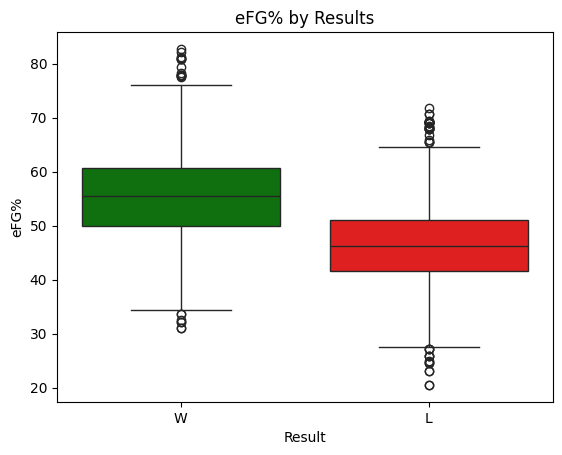

In [ ]:

subset_df=historical_df.sample(n=300,random_state=17)
historical_df['eFG%_O'] = pd.to_numeric(historical_df['eFG%_O'], errors='coerce')
mean_fg=historical_df['eFG%_O'].mean()
won_df = historical_df[historical_df['Won/Loss'] == 'W']
lost_df = historical_df[historical_df['Won/Loss'] == 'L']
won_df.dropna(subset=['eFG%_O'])
lost_df.dropna(subset=['eFG%_O'])
results=stats.ttest_1samp(won_df['eFG%_O'], mean_fg)
results2=stats.ttest_1samp(lost_df['eFG%_O'], mean_fg)
print(f'Statistic: {results[0]}, P-Value: {results[1]}')
print(f'Statistic: {results2[0]}, P-Value: {results2[1]}')
sns.boxplot(x='Won/Loss', y='eFG%_O', data=historical_df,hue='Won/Loss', palette={'W': 'green', 'L': 'red'}, legend=False)
plt.title('eFG% by Results')
plt.xlabel('Result')
plt.ylabel('eFG%')

plt.show()
#display(new_historical_df)

As we can see from this T-Test there is a clear correlation between Offensive effective field goal percentage and the chance of a team winning a game which we can use later in our model to predict whether or not a team will win a game based on their average field goal percentage. Our results also show a P-Value of near 0 showing there is a extremely high correlation between the two. We used the single sample because when using the independent two-sample the p-value was so low it rounded to 0 so we went with 2 single sample instead.
Doing this we know we can reject the null hypothesis and accept the alternative.

**Statistical Test 2-**

Now we will run a chi-square test to see if being home neutral or away really impacts win and losses of games. We have the true advantage according to other data but we should compare with a chi square to see if there is a actual large impact where it is important to factor into our project.\
**H0:** There will be no impact on winning or losing games based on where the games are played.\
**HA:** There will be a statistically signficant impact on winning or losing games based on where the games are played.\
**α:** 0.05

Venue       A    H    N
Won/Loss               
L         368  100  131
W         115  189   97
Chi-Square Statistic: 130.9313209679015
P-Value: 3.703607011976282e-29


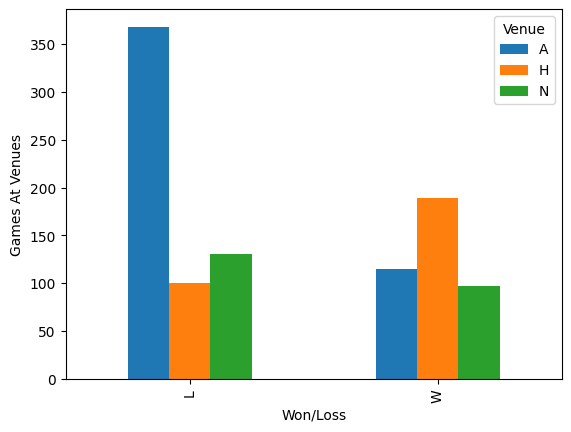

In [ ]:
subset_df=historical_df.sample(n=1000,random_state=17)
contingency_table=pd.crosstab(subset_df['Won/Loss'],subset_df['Venue'])
print(contingency_table)
chi_results=stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi_results[0]}')
print(f'P-Value: {chi_results[1]}')
ax=contingency_table.plot(kind='bar')
ax.set_ylabel('Games At Venues')
plt.show()


From this we can see there is a statistical difference between winning games and the venue these games are held in. However as we can see through our chi squared bar graph there is a significantly higher could of away losses overall than any other game in our data set. This could be skewing our results and is something we definetly should account for moving forward. However due to our low p-value we reject the H0 and ac

**Statistical Test 3-**

Now we will see if having a higher adjusted offensive efficiency or AdjO will lead to a higher score and vice versa with a 2 sample T test.\
**H0:** A higher adjusted offensive efficiency has no impact on having a higher score.\
**HA:** A higher adjusted offensive efficiency has a statistical impact on having a higher score.\
**α=**0.05


Statistic: 13.621963602415581, P-Value: 3.512026207977888e-33


<Axes: xlabel='Adj. O', ylabel='Score'>

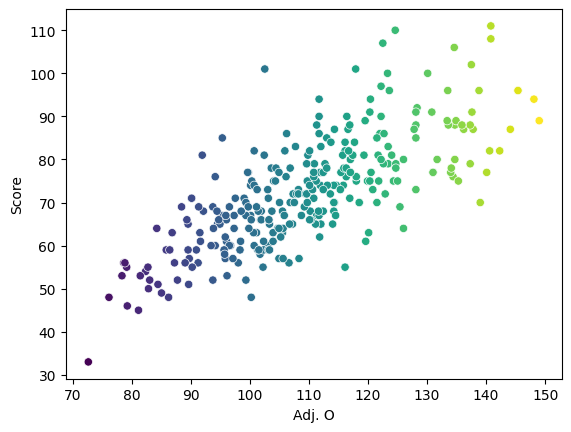

In [ ]:
subset_df=historical_df.sample(n=300,random_state=17)
subset_df['Adj. O'] = pd.to_numeric(subset_df['Adj. O'], errors='coerce')
mean_adjO=subset_df['Adj. O'].mean()
high_adjO=subset_df[subset_df['Adj. O']>mean_adjO]
low_adjO=subset_df[subset_df['Adj. O']<mean_adjO]
results=stats.ttest_ind(high_adjO['Score'],low_adjO['Score'])
print(f'Statistic: {results[0]}, P-Value: {results[1]}')
sns.scatterplot(x='Adj. O', y='Score', data=subset_df,hue='Adj. O', legend=False, palette='viridis')


From the graph and from out p-value we reject the HO and we can say that adjusted offensive efficiency has a statistical impact on having a higher or lower score. So overall we can see generally a higher adjO leads to a higher score.

# ML Models

Make new DFs based on matchups and add some features that we can run through our model. Many of the features we added are based on the "Four Factors" of predicting a basketball game. These features have been heavily researched by sports analytics professionals and have been found to be the most predictive features for the outcome of a basketball game. The four factors are efg%, tov%, ft/fga, and orb%. Since we have a classification task (win/loss) and a regression task (spread) we will need multiple models that can help complete these tasks. We will run classification on Logistic Regression, Random Forest, and Gradient Boosting, and use Random Forest and Gradient Boosting for regression tasks.

In [ ]:
def create_matchup_features(df):
    team_stats = {}
    for team in df['Team'].unique():
        team_data = df[df['Team'] == team]
        team_stats[team] = {
            'Avg_Adj_O': team_data['Adj. O'].mean(),
            'Avg_Adj_D': team_data['Adj. D'].mean(),
            'Avg_T': team_data['T'].mean(),
            'Avg_eFG_O': team_data['eFG%_O'].mean(),
            'Avg_TO_O': team_data['TO%_O'].mean(),
            'Avg_Reb_O': team_data['Reb%_O'].mean(),
            'Avg_FTR_O': team_data['FTR_O'].mean(),
            'Avg_eFG_D': team_data['eFG%_D'].mean(),
            'Avg_TO_D': team_data['TO%_D'].mean(),
            'Avg_Reb_D': team_data['Reb%_D'].mean(),
            'Avg_FTR_D': team_data['FTR_D'].mean(),
        }
    matchup_df = df.copy()
    opp_columns = [
        'Opp_Avg_Adj_O', 'Opp_Avg_Adj_D', 'Opp_Avg_T',
        'Opp_Avg_eFG_O', 'Opp_Avg_TO_O', 'Opp_Avg_Reb_O', 'Opp_Avg_FTR_O',
        'Opp_Avg_eFG_D', 'Opp_Avg_TO_D', 'Opp_Avg_Reb_D', 'Opp_Avg_FTR_D'
    ]

    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df.rename(columns={'index': 'Opp.'}, inplace=True)
    team_stats_df = team_stats_df.rename(columns=lambda x: f"Opp_{x}" if x != 'Opp.' else x)
    matchup_df = matchup_df.merge(team_stats_df, how='left', on='Opp.')
    # display(matchup_df)
    # display(team_stats_df)
    matchup_df.fillna(0, inplace=True)
    matchup_df['Offense_vs_Defense'] = matchup_df['Adj. O'] - matchup_df['Opp_Avg_Adj_D']
    matchup_df['Defense_vs_Offense'] = matchup_df['Adj. D'] - matchup_df['Opp_Avg_Adj_O']
    matchup_df['Tempo_Differential'] = matchup_df['T'] - matchup_df['Opp_Avg_T']
    matchup_df['eFG_Advantage_O'] = matchup_df['eFG%_O'] - matchup_df['Opp_Avg_eFG_D']
    matchup_df['TO_Advantage_O'] = matchup_df['Opp_Avg_TO_D'] - matchup_df['TO%_O']
    matchup_df['Reb_Advantage_O'] = matchup_df['Reb%_O'] - matchup_df['Opp_Avg_Reb_D']
    matchup_df['FTR_Advantage_O'] = matchup_df['FTR_O'] - matchup_df['Opp_Avg_FTR_D']

    matchup_df['eFG_Advantage_D'] = matchup_df['Opp_Avg_eFG_O'] - matchup_df['eFG%_D']
    matchup_df['TO_Advantage_D'] = matchup_df['TO%_D'] - matchup_df['Opp_Avg_TO_O']
    matchup_df['Reb_Advantage_D'] = matchup_df['Opp_Avg_Reb_O'] - matchup_df['Reb%_D']
    matchup_df['FTR_Advantage_D'] = matchup_df['Opp_Avg_FTR_O'] - matchup_df['FTR_D']
    matchup_df['True Advantage'] = matchup_df['True Advantage'].astype(float)
    return matchup_df

Splitting and Scaling

In [ ]:
historical_data = pd.read_csv('Cleaned_Historicals.csv')
current_data = pd.read_csv('Cleaned_2025.csv')
numeric_cols = [
    'Adj. O', 'Adj. D', 'T',
    'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O',
    'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D', 'hca'
]
for col in numeric_cols:
    historical_data[col] = pd.to_numeric(historical_data[col], errors='coerce')
    current_data[col] = pd.to_numeric(current_data[col], errors='coerce')
historical_matchups = create_matchup_features(historical_data)
current_matchups = create_matchup_features(current_data)
all_features =  [
    'Adj. O', 'Adj. D', 'T',
    'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O',
    'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D',
    'hca',  'Offense_vs_Defense', 'Defense_vs_Offense', 'Tempo_Differential',
    'eFG_Advantage_O', 'TO_Advantage_O', 'Reb_Advantage_O', 'FTR_Advantage_O',
    'eFG_Advantage_D', 'TO_Advantage_D', 'Reb_Advantage_D', 'FTR_Advantage_D','True Advantage'
]
# all_features.remove('Won/Loss')
X_train = historical_matchups[all_features].copy()
# print('xtrain')
# display(X_train)
y_train_winner = (historical_matchups['Won/Loss'] == 'W').astype(int)
y_train_spread = historical_matchups['Spread']
y_train_team_score = historical_matchups['Score']
y_train_opp_score = historical_matchups['Opp_Score']
X_test = current_matchups[all_features].copy()
y_test_winner = (current_matchups['Won/Loss'] == 'W').astype(int)
y_test_spread = current_matchups['Spread']
y_test_team_score = current_matchups['Score']
y_test_opp_score = current_matchups['Opp_Score']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Logistic Regression**

Logistic regression was used to predict the winner of a given matchup. We chose logistic regression because it is a good model for classification tasks, in this case deciding the if a team will Win or Lose a given matchup.

In [ ]:
def train_logistic_regression():
    print("\n=== Training Logistic Regression Model for Win Prediction ===")

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train_winner)

    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train_winner, train_preds)
    test_accuracy = accuracy_score(y_test_winner, test_preds)

    train_report = classification_report(y_train_winner, train_preds)
    test_report = classification_report(y_test_winner, test_preds)
    print(f"Training accuracy: {train_accuracy}")
    print(f"Testing accuracy: {test_accuracy}")
    print(f"Classification Report: {train_report}")
    print(f"Classification Report: {test_report}")
    cm = confusion_matrix(y_test_winner, test_preds)
    return model, train_accuracy, test_accuracy, cm

**Plotting for Logistic Regression**

We plotted a confusion matrix and feature importance for our logistic regression model.

In [ ]:
def plot_log_reg(model, cm):
    #Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt= 'd', cmap='Blues',
                xticklabels=['Loss', 'Win'],
                yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Logistic Regression Confusion Matrix')
    #Plot importance
    coefficients = pd.DataFrame({
        'Feature': all_features,
        'Coefficient': model.coef_[0]
    }).sort_values('Coefficient', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients)
    plt.title('Logistic Regression Feature Coefficients')
    plt.tight_layout()
    plt.plot()

We will try using Random Forest and Gradient Boost for predicting the spread as well as predicting the winner.

**Random Forest**

We output the accuracy, classification report, r2 score, and MAE for both training and testing data.

In [ ]:
def train_random_forest():
    print("\n=== Training Random Forest Models ===")

    model = RandomForestClassifier(n_estimators=1000, max_depth=8)
    model.fit(X_train_scaled, y_train_winner)

    rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=8,min_samples_leaf=5)
    rf_regressor.fit(X_train_scaled, y_train_spread)

    train_win_preds = model.predict(X_train_scaled)
    test_win_preds = model.predict(X_test_scaled)

    train_spread_preds = rf_regressor.predict(X_train_scaled)
    test_spread_preds = rf_regressor.predict(X_test_scaled)

    train_win_accuracy = accuracy_score(y_train_winner, train_win_preds)
    test_win_accuracy = accuracy_score(y_test_winner, test_win_preds)

    train_report = classification_report(y_train_winner, train_win_preds)
    test_report = classification_report(y_test_winner, test_win_preds)
    print(f"Random Forest Win Prediction:")
    print(f"Training accuracy: {train_win_accuracy}")
    print(f"Testing accuracy: {test_win_accuracy}")
    print(f"Classification Report: {train_report}")
    print(f"Classification Report: {test_report}")
    train_spread_mae = mean_absolute_error(y_train_spread, train_spread_preds)
    test_spread_mae = mean_absolute_error(y_test_spread, test_spread_preds)
    train_spread_r2 = r2_score(y_train_spread, train_spread_preds)
    test_spread_r2 = r2_score(y_test_spread, test_spread_preds)
    print(f"Random Forest Spread Prediction:")
    print(f"Training MAE: {train_spread_mae}")
    print(f"Testing MAE: {test_spread_mae:}")
    print(f"Training R2: {train_spread_r2}")
    print(f"Testing R2: {test_spread_r2:}")
    cm = confusion_matrix(y_test_winner, test_win_preds)
    return model, rf_regressor, train_win_accuracy, test_win_accuracy, train_spread_mae, test_spread_mae, cm


Plotting Random Forest

In [ ]:
def plot_rf(cm, model):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm,annot=True,fmt= 'd', cmap='Greens',
                xticklabels=['Loss', 'Win'],
                yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Win Prediction Confusion Matrix')
    win_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=win_importance.head(15), palette='Greens' , hue='Importance')
    plt.title('Random Forest Win Prediction - Feature Importance')

    plt.plot()


**Gradient Boost Model**

We output the accuracy, classification report, r2 score, and MAE for both training and testing data.

In [ ]:
def train_grad_boost():
    print("\n=== Training Gradient Boost Models ===")

    model = GradientBoostingClassifier()
    model.fit(X_train_scaled, y_train_winner)

    gb_regressor = GradientBoostingRegressor()
    gb_regressor.fit(X_train_scaled, y_train_spread)

    train_win_preds = model.predict(X_train_scaled)
    test_win_preds = model.predict(X_test_scaled)

    train_spread_preds = gb_regressor.predict(X_train_scaled)
    test_spread_preds = gb_regressor.predict(X_test_scaled)

    train_win_accuracy = accuracy_score(y_train_winner, train_win_preds)
    test_win_accuracy = accuracy_score(y_test_winner, test_win_preds)

    train_report = classification_report(y_train_winner, train_win_preds)
    test_report = classification_report(y_test_winner, test_win_preds)
    print(f"Gradient Boost Win Prediction:")
    print(f"Training accuracy: {train_win_accuracy}")
    print(f"Testing accuracy: {test_win_accuracy}")
    print(f"Classification Report: {train_report}")
    print(f"Classification Report: {test_report}")
    train_spread_mae = mean_absolute_error(y_train_spread, train_spread_preds)
    test_spread_mae = mean_absolute_error(y_test_spread, test_spread_preds)
    train_spread_r2 = r2_score(y_train_spread, train_spread_preds)
    test_spread_r2 = r2_score(y_test_spread, test_spread_preds)
    print(f"Random Forest Spread Prediction:")
    print(f"Training MAE: {train_spread_mae}")
    print(f"Testing MAE: {test_spread_mae:}")
    print(f"Training R2: {train_spread_r2}")
    print(f"Testing R2: {test_spread_r2:}")
    cm = confusion_matrix(y_test_winner, test_win_preds)
    return model, gb_regressor, train_win_accuracy, test_win_accuracy,train_spread_mae, test_spread_mae, cm, train_spread_r2, test_spread_r2


In [ ]:
def plot_gb(cm, model):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt= 'd',cmap='Reds',
                xticklabels=['Loss', 'Win'],
                yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Gradient Boost Win Prediction Confusion Matrix')
    win_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=win_importance.head(15), palette='Reds', hue='Importance')
    plt.title('Random Forest Win Prediction - Feature Importance')

    plt.plot()

Function to compare the training and testing accuracy of Random Forest and Gradient Boost.

In [ ]:
def compare_models(log_acc, log_tacc ,rf_acc, rf_tacc, gb_acc, gb_tacc, rf_MAE, gb_MAE, rf_tMAE, gb_tMAE):
    plt.figure(figsize=(8, 6))
    width = 0.35
    x = np.arange(3)

    plt.bar(x - width/2, [log_acc,rf_acc, gb_acc], width, label='Training Accuracy')
    plt.bar(x + width/2, [log_tacc,rf_tacc, gb_tacc], width, label='Testing Accuracy')

    plt.ylabel('Accuracy')
    plt.title('Classification Model Accuracy Comparison')
    plt.xticks(x, ['Logistic Regression','Random Forest', 'Gradient Boost'])
    plt.legend()
    plt.plot()
    x = np.arange(2)

    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, [rf_MAE, gb_MAE], width, label='Training MAE')
    plt.bar(x + width/2, [rf_tMAE, gb_tMAE], width, label='Testing MAE')
    plt.ylabel('Mean Squared Error')
    plt.title('Regression Model Accuracy Comparison')
    plt.xticks(x, ['Random Forest', 'Gradient Boost'])
    plt.legend()
    plt.plot()
    plt.show()

After training and testing our 3 models, we determined that Logistic Regression was the best predictor of the winner of a matchup based on the higher testing accuracy and classification reports, and determined that Gradient Boost was the best regression model for the spread, with the lowest MAE and highest accuracy.

Train Models


=== Training Logistic Regression Model for Win Prediction ===
Training accuracy: 0.9725526075022873
Testing accuracy: 0.9651300236406619
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4520
           1       0.97      0.96      0.97      3131

    accuracy                           0.97      7651
   macro avg       0.97      0.97      0.97      7651
weighted avg       0.97      0.97      0.97      7651

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1206
           1       0.92      0.96      0.94       486

    accuracy                           0.97      1692
   macro avg       0.95      0.96      0.96      1692
weighted avg       0.97      0.97      0.97      1692


=== Training Random Forest Models ===
Random Forest Win Prediction:
Training accuracy: 0.9803947196444909
Testing accuracy: 0.8959810874704491
Classification Rep

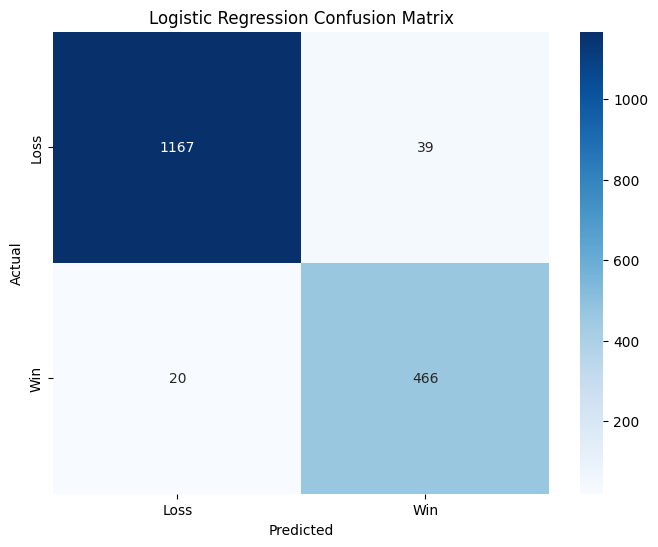

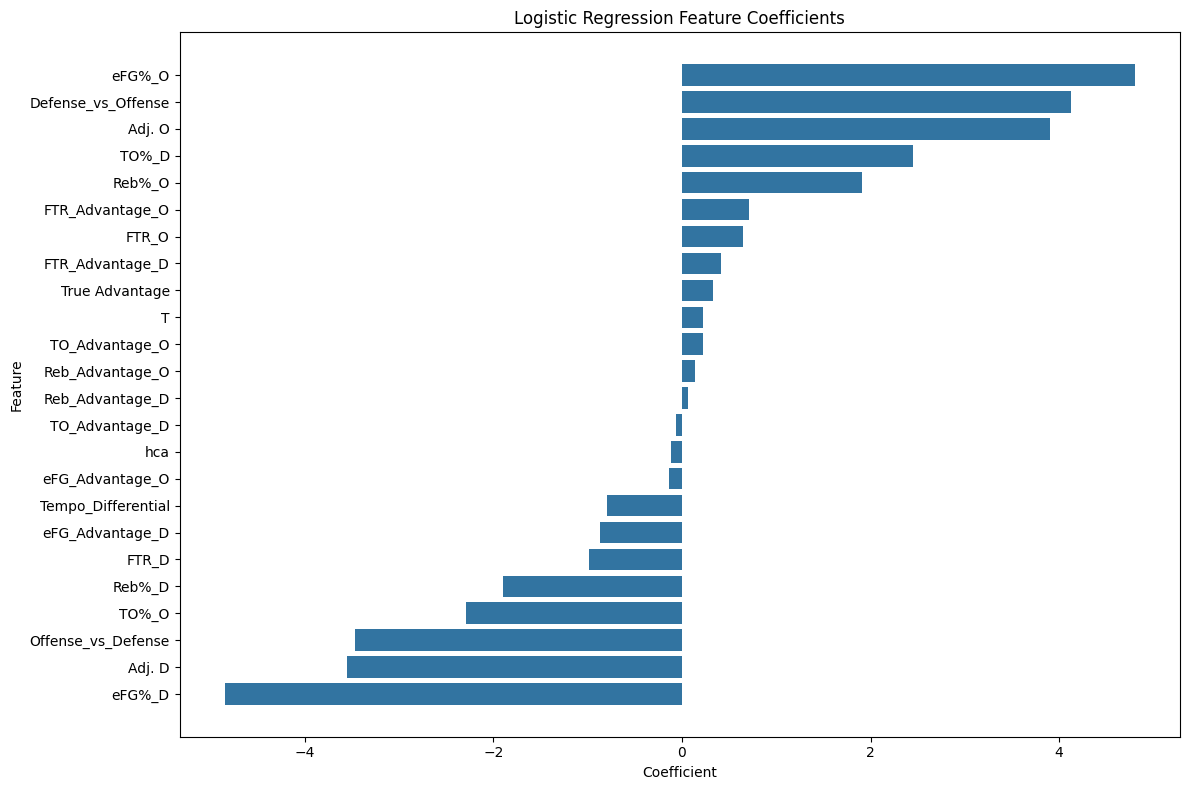

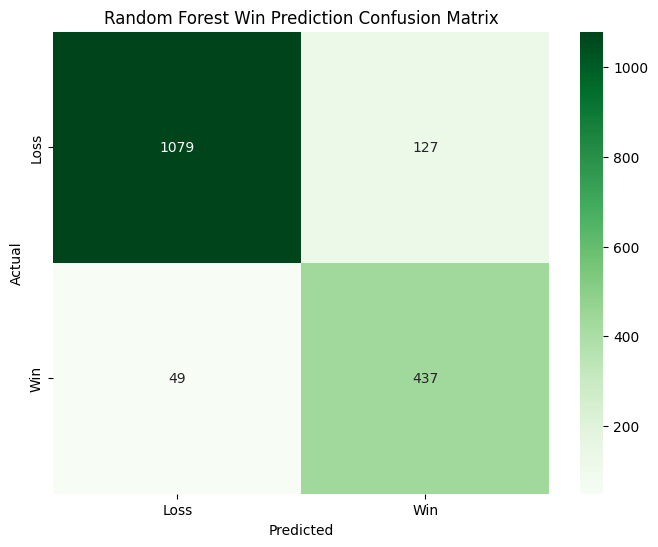

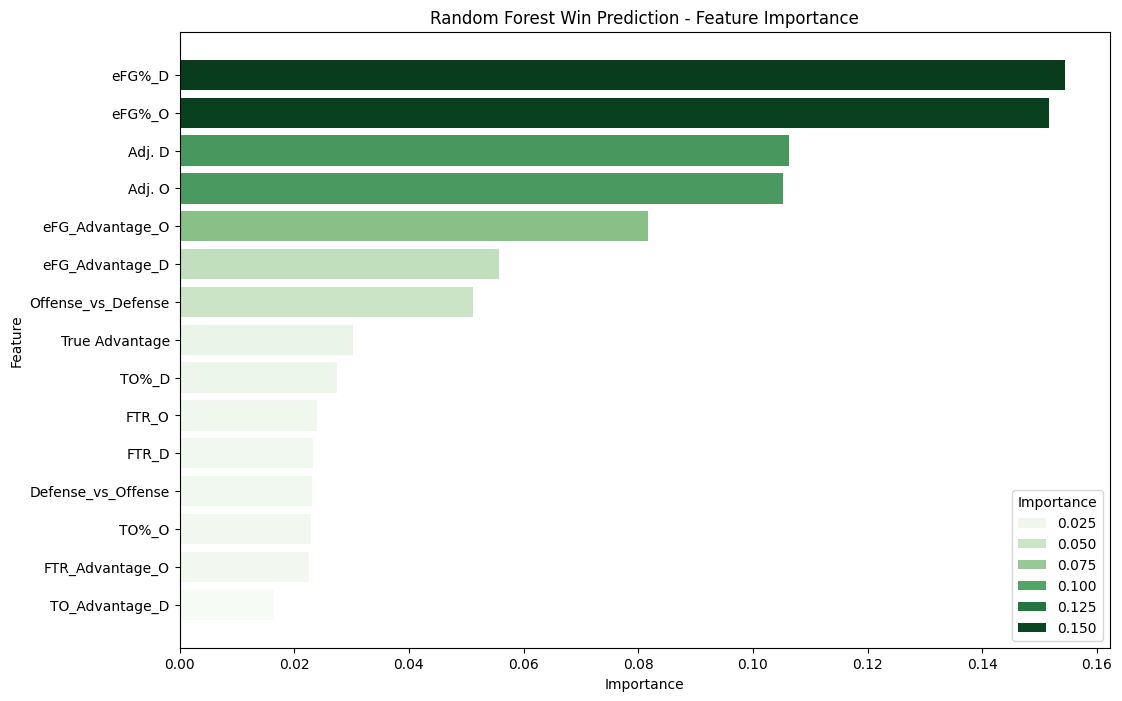

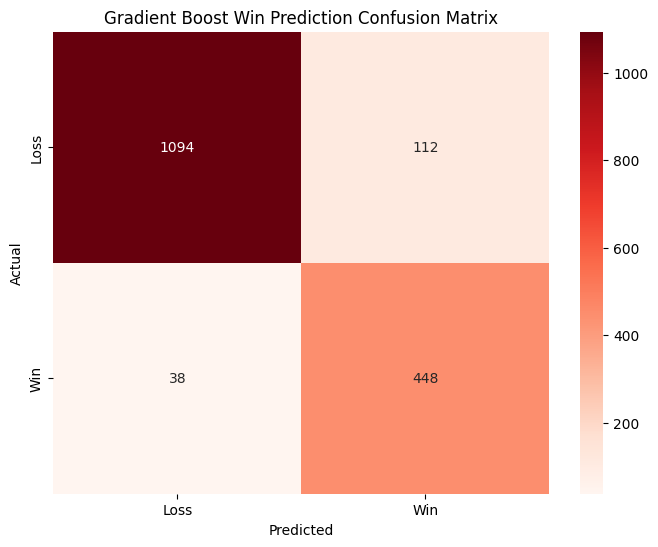

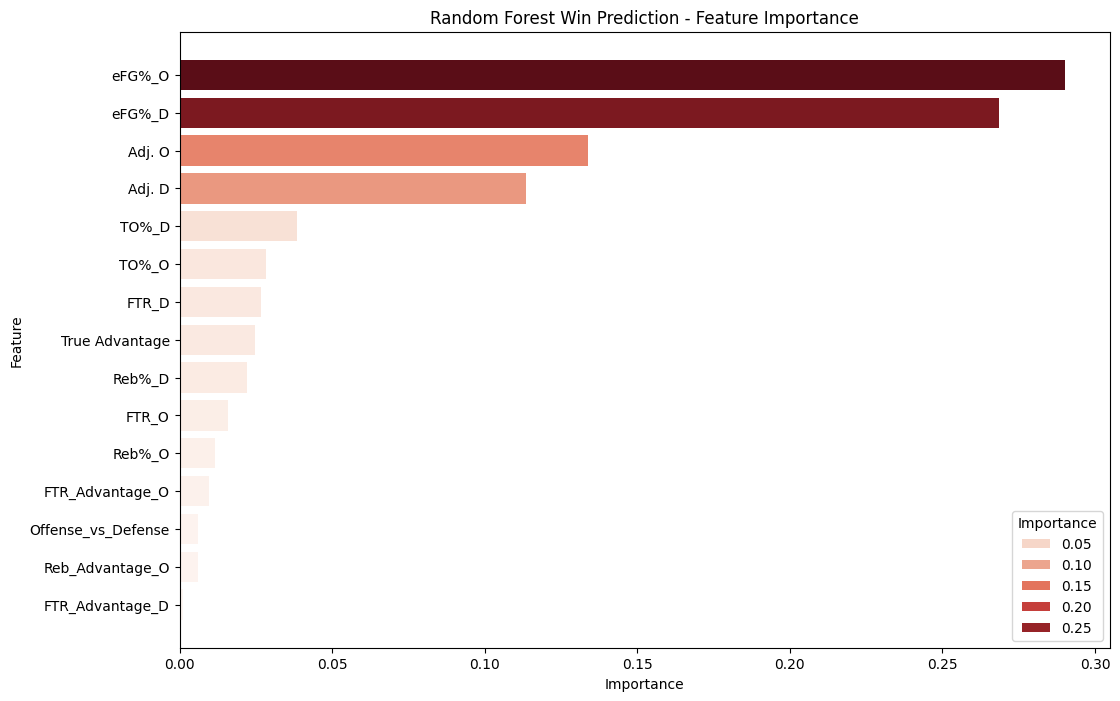

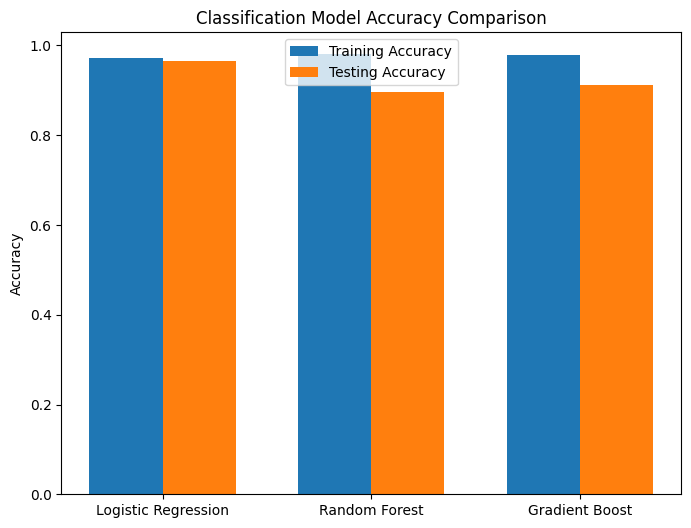

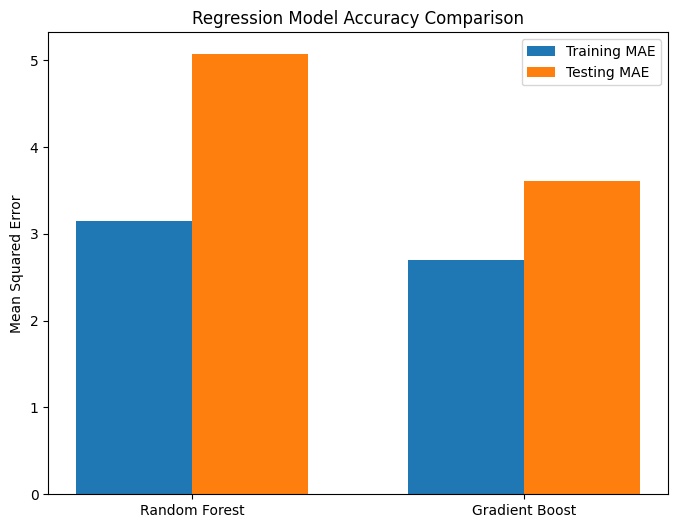

In [ ]:
def train_models():
    # Train all models
    log_result = train_logistic_regression()
    plot_log_reg(log_result[0],log_result[3])
    rf_results = train_random_forest()
    gb_results = train_grad_boost()
    plot_rf(rf_results[6],rf_results[0])
    plot_gb(gb_results[6],gb_results[0])
    compare_models(log_result[1],log_result[2],rf_results[2], rf_results[3], gb_results[2], gb_results[3],rf_results[4], gb_results[4], rf_results[5], gb_results[5])
    return (log_result[0], rf_results[0], gb_results[0], gb_results[1])

(log_model, rf_model, gb_model, gb_reg)=train_models()

**Analysis of features**<br>
From this data we learn feature importance and confirms our predictions from our data exploration. We see that the True Advantage (advantage of being the home team) does have a noticible impact based on feature importance. We also see from the feature importance that the four factors that our research said were most critical in predicting basketball games lined up very similarly with the feature important in our classification models.


<br>**Comparing Models** <br>
When we look at the graphs produced from our compare models graph we can see there are clear models we should be using if we are to predict future games. By looking at both the graphs and the classification report models we see that logistic regression is the best for purely classifying a winner or a loser and we will use that for predicting a winner between two matchups. Analyzing the results from the spread we can determine that gradient boost is noticiably better at finding results of the spread. When anylzing the MAE and the R2 of the regression models that we trained we can see a clear advantage of using gradient boost so we will use that when trying to predict the spread of basketball games later on.

**Game Predictor**

To determine the winner of a matchup and the projected spread, we can utilize the below functions and current data for two teams to predict the matchup.

In [ ]:
def two_team_matchup(team1, team2):
    team1=team1.upper()
    team2=team2.upper()
    current_data['Team'] = current_data['Team'].str.upper()
    team1_data = current_data[current_data['Team'] == team1]
    team2_data = current_data[current_data['Team'] == team2]
    if team1_data.empty or team2_data.empty:
        print("One or both teams not found in the dataset.")
        return
    team1_avg = team1_data[numeric_cols].mean()
    team2_avg = team2_data[numeric_cols].mean()
    #display(team1_avg)
    #display(team2_avg)
    features = {
        'Adj. O': team1_avg['Adj. O'],
        'Adj. D': team1_avg['Adj. D'],
        'T': team1_avg['T'],
        'eFG%_O': team1_avg['eFG%_O'],
        'TO%_O': team1_avg['TO%_O'],
        'Reb%_O': team1_avg['Reb%_O'],
        'FTR_O': team1_avg['FTR_O'],
        'eFG%_D': team1_avg['eFG%_D'],
        'TO%_D': team1_avg['TO%_D'],
        'Reb%_D': team1_avg['Reb%_D'],
        'FTR_D': team1_avg['FTR_D'],
        'hca': team1_avg['hca'],
        'Offense_vs_Defense': team1_avg['Adj. O'] - team2_avg['Adj. D'],
        'Defense_vs_Offense': team1_avg['Adj. D'] - team2_avg['Adj. O'],
        'Tempo_Differential': team1_avg['T'] - team2_avg['T'],
        'eFG_Advantage_O': team1_avg['eFG%_O'] - team2_avg['eFG%_D'],
        'TO_Advantage_O': team2_avg['TO%_D'] - team1_avg['TO%_O'],
        'Reb_Advantage_O': team1_avg['Reb%_O'] - team2_avg['Reb%_D'],
        'FTR_Advantage_O': team1_avg['FTR_O'] - team2_avg['FTR_D'],
        'eFG_Advantage_D': team2_avg['eFG%_O'] - team1_avg['eFG%_D'],
        'TO_Advantage_D': team1_avg['TO%_D'] - team2_avg['TO%_O'],
        'Reb_Advantage_D': team2_avg['Reb%_O'] - team1_avg['Reb%_D'],
        'FTR_Advantage_D': team2_avg['FTR_O'] - team1_avg['FTR_D'],
        'True Advantage': 0
    }
    matchup_df = pd.DataFrame([features])
    matchup_df.fillna(0, inplace=True)

    return matchup_df


Our predict winner function takes the current data for both teams and applies the logistic regression model to determine the winner.

In [ ]:
def predict_winner(team1, team2, home):
    team1=team1.upper()
    team2=team2.upper()
    current_data['Team'] = current_data['Team'].str.upper()
    team1_data = current_data[current_data['Team'] == team1]
    team2_data = current_data[current_data['Team'] == team2]
    if team1_data.empty or team2_data.empty:
        print("One or both teams not found in the dataset.")
        return
    matchup1 = two_team_matchup(team1, team2)
    matchup2 = two_team_matchup(team2, team1)
    if home.lower() == 'h':
      matchup1['True Advantage'] = team1_data['hca'].mean()
      matchup2['True Advantage'] = 0
    elif home.lower() == 'a':
      matchup1['True Advantage'] = 0
      matchup2['True Advantage'] = team2_data['hca'].mean()
    else:
      matchup1['True Advantage'] = 0
      matchup2['True Advantage'] = 0
    # team1_avg = team1_matchup[all_features].mean()
    # team2_avg = team2_matchup[all_features].mean()
    # X = matchup
    matchup1.fillna(0, inplace=True)
    matchup2.fillna(0, inplace=True)
    m1_scaled = scaler.transform(matchup1)
    m2_scaled = scaler.transform(matchup2)
    prediction1 = log_model.predict_proba(m1_scaled)
    prediction2 = log_model.predict_proba(m2_scaled)
    team1_win_prob = prediction1[0][1]
    team2_win_prob = prediction2[0][1]
    # print(f"Logistic Regression Win Probability for {team1}: {team1_win_prob}")
    # print(f"Logistic Regression Win Probability for {team2}: {team2_win_prob}")
    if team1_win_prob>team2_win_prob:
      print(f"Most likely for {team1} to win in Log Reg")
    else:
      print(f"Most likely for {team2} to win in Log Reg")
    matchup1.to_csv('matchup.csv', index=False)
    # display(team1_matchup)
    # display(team2_matchup)

Our predict spread function takes the current data for two teams and uses Gradient Boost to predict the spread between the two teams.

In [ ]:
def predict_spread(team1, team2, home):

    team1=team1.upper()
    team2=team2.upper()
    current_data['Team'] = current_data['Team'].str.upper()
    team1_data = current_data[current_data['Team'] == team1]
    team2_data = current_data[current_data['Team'] == team2]
    if team1_data.empty or team2_data.empty:
        print("One or both teams not found in the dataset.")
        return
    matchup1 = two_team_matchup(team1, team2)
    matchup2 = two_team_matchup(team2, team1)
    if home.lower() == 'h':
      matchup1['True Advantage'] = team1_data['hca'].mean()
      matchup2['True Advantage'] = 0
    elif home.lower() == 'a':
      matchup1['True Advantage'] = 0
      matchup2['True Advantage'] = team2_data['hca'].mean()
    else:
      matchup1['True Advantage'] = 0
      matchup2['True Advantage'] = 0

    matchup1.fillna(0, inplace=True)
    matchup2.fillna(0, inplace=True)
    m1_scaled = scaler.transform(matchup1)
    m2_scaled = scaler.transform(matchup2)
    prediction1 = gb_reg.predict(m1_scaled)
    prediction2 = gb_reg.predict(m2_scaled)
    spread = prediction1[0] - prediction2[0]

    if spread > 0:
      print(f"Most likely for {team1} to win in Gradient Boost by {spread} points")
    else:
      print(f"Most likely for {team2} to win in Gradient Boost by {-spread} points")


Run this main method to predict future games.

In [ ]:
def main():
  # t1 = input("What is team 1? ")
  # t2 = input("What is team 2? ")
  # home = input("Is team 1 home? (h for home a for away, n for neutral) ")
  # predict_winner(t1,t2,home)
  # predict_spread(t1,t2,home)
  '''heres some examples since the running predictor wont actually work in static html
  lets do the round of 16 instead of using inputs'''
  predict_winner('Maryland','Florida','n')
  predict_spread('Maryland','Florida','n')
  predict_winner('Houston', 'Purdue', 'n')
  predict_spread('Houston', 'Purdue', 'n')
  predict_winner('Texas Tech', 'Arkansas', 'n')
  predict_spread('Texas Tech', 'Arkansas', 'n')
  predict_winner('Auburn', 'Michigan', 'n')
  predict_spread('Auburn', 'Michigan', 'n')
  predict_winner('Alabama', 'BYU', 'n')
  predict_spread('Alabama', 'BYU', 'n')
  predict_winner('Duke', 'Arizona', 'n')
  predict_spread('Duke', 'Arizona', 'n')
  predict_winner('Michigan St.', 'Mississippi', 'n')
  predict_spread('Michigan St.', 'Mississippi', 'n')
  predict_winner('Tennessee', 'Kentucky', 'n')
  predict_spread('Tennessee', 'Kentucky', 'n')
  predict_spread('Maryland','Michigan St.','n')
  predict_spread('Maryland','Michigan St.','h')
  predict_spread('Maryland','Michigan St.','a')

main()

Most likely for FLORIDA to win in Log Reg
Most likely for FLORIDA to win in Gradient Boost by 2.713302750668311 points
Most likely for HOUSTON to win in Log Reg
Most likely for HOUSTON to win in Gradient Boost by 9.136846641801899 points
Most likely for TEXAS TECH to win in Log Reg
Most likely for TEXAS TECH to win in Gradient Boost by 1.8650671313101763 points
Most likely for AUBURN to win in Log Reg
Most likely for AUBURN to win in Gradient Boost by 8.58018096677944 points
Most likely for ALABAMA to win in Log Reg
Most likely for ALABAMA to win in Gradient Boost by 6.040648611257204 points
Most likely for DUKE to win in Log Reg
Most likely for DUKE to win in Gradient Boost by 6.537435241724356 points
Most likely for MICHIGAN ST. to win in Log Reg
Most likely for MICHIGAN ST. to win in Gradient Boost by 1.1278552937674013 points
Most likely for TENNESSEE to win in Log Reg
Most likely for TENNESSEE to win in Gradient Boost by 3.7390155087847106 points
Most likely for MICHIGAN ST. to wi

Based on these guesses we got everything right from these games and the spread is close.


Results Tracking During March Madness

In [ ]:
import pandas as pd

results_df = pd.read_csv("Results.csv")
results_summary_df = pd.read_csv("Results_Summary.csv")
print(results_df.head())
print(results_summary_df.head())

        Date         Team One       Team Two Venue Predicted Winner  \
0  3/13/2025            Akron  Bowling Green     H            Akron   
1  3/13/2025  St. Bonaventure       Duquesne     N  St. Bonaventure   
2  3/13/2025           Oregon        Indiana     A           Oregon   
3  3/13/2025             Duke   Georgia Tech     H             Duke   
4  3/13/2025       St. John's         Butler     H        St. Johns   

       Predicted Spread         ESPN BET Line                     Actual Game  \
0            Akron -9.2           Akron -12.5      Akron 96, Bowling Green 67   
1  St. Bonaventure -6.2  St. Bonaventure -2.5  St Bonaventure 64, Duqeusne 59   
2           Oregon -6.2           Oregon -2.5           Oregon 72, Indiana 59   
3            Duke -13.6            Duke -22.5        Duke 78, Georgia Tech 70   
4       St. John's -6.9      St. John's -12.5        St. John's 78, Butler 57   

     Actual Winner Winner Correct       ResultSpread  Difference  \
0            Akron

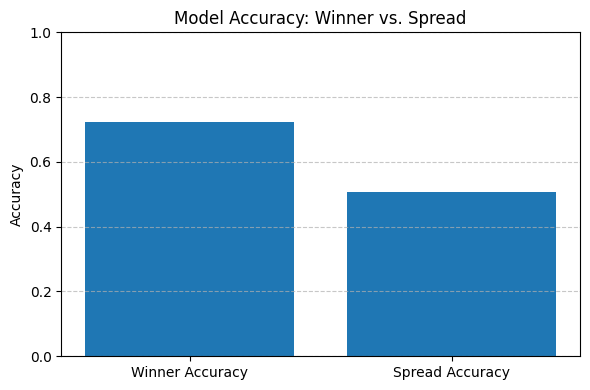

In [ ]:
summary = results_summary_df.iloc[0]

labels = ['Winner Accuracy', 'Spread Accuracy']
values = [summary['Winner Accuracy'], summary['Spread Accuracy']]

plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title('Model Accuracy: Winner vs. Spread')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Insights and Conclusion
We predicted the spread and winner for 152 games during conference tournaments, the NIT tournament, and March Madness. We predicted the correct winner for 110 out of 152 games, achieving an accuracy of 72.4%. In terms of predicting the spread, we predicted 77 out of 152 games correctly, achieving an accuracy of 50.7%. For our betting assumptions we assumed that 1 unit was bet on each game, where every correct bet would return .91 units of profit (assumes -110 odds) and every incorrect game would yield -1 unit loss. Ultimately our model lost 4.93 units, making the model unprofitable. For a betting model to be profitable, it would need to achieve 52.4% accuracy or higher. Lastly, looking at our MAE, a key metric for a basketball model, our model outputted a 9.6 MAE, much higher than a sportsbook's model which would average 3-5 for MAE.  

**ANSWERING OUR QUESTIONS**

1) Can we accurately predict the outcome of a college basketball game using advanced team statistics?

A: According to our results we can accurately predict the winner of a matchup 72.4% of the time, and accurately predict the direction of the spread 50.7% of the time. Our model can predict the winner of a matchup with strong accuracy, however beating the Sportsbooks is still a challenge for our model, which does slightly better than a coin flip.

2)How much does home court advantage actually impact the final score or spread?

A: Home court advantage or true advantage is the 8th most important feature in our feature set, meaning it is one of the most significant factors in determining the outcome of a game. While we can't say precisely how many points it accounts for in each matchup because a team's home court advantage varies, any prediction model should absolutely include home court advantage as a feature.

3)Which factors—offensive efficiency, defensive metrics, location—are most important in determining a game’s result?

A: From our analysis, efg% is the most important feature, both offensive efg% and defensive efg%, meaning how well the offense scores and how well they limit the percentage of the opponent. This is followed by adjusted offense and defense, which highlight how good a team's offense and defense are compared to the average Division 1 team. Any adjusted offense above 100 is considered above average and any adjusted defense below 100 is considered above average. The next most important stat is TOV% for both offense and defense, meaning how well a team limits its turnovers and forces the other team to make turnovers. This highlights that the number of possessions is very important to the outcome of a game, and generally the team that shoots better and has more possessions will almost certainly win.

**POTENTIAL IMPROVEMENTS**

Since predicting the outcome of a college basketball game is based on numerous variables, there were several variables not looked at in our analysis. For example, we did not analyze coaching matchups, injuries, distance traveled, last 5 games data, runs per game, and many other factors that significantly impact the outcome of a basketball game. Additionally, we also could have looked into implementing a neural network to model the complex relationships between factors, which may have been more predictive. Additionally, we could have increased the size of our training and testing datasets to include more games, giving our models more data to learn from. Another challenge we faced is that our testing data does not have adequate samples for smaller colleges (low D1) that make predicting their matchups more challenging.

**Sources**


https://barttorvik.com/trankpre.php

https://www.boydsbets.com/college-basketball-home-court-advantage/

https://archive.org/details/basketballonpape0000dean/mode/2up